In [ ]:
!git clone https://github.com/BSCH-FDL-2024/Face-Mask-Dataset.git

Cloning into 'Face-Mask-Dataset'...
remote: Enumerating objects: 11633, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 11633 (delta 0), reused 1 (delta 0), pack-reused 11631
Receiving objects: 100% (11633/11633), 326.21 MiB | 69.50 MiB/s, done.
Checking out files: 100% (11792/11792), done.


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

import os
os.listdir()

['04b_asl_predictions.ipynb',
 '05a_doggy_door.ipynb',
 'Face_Mask_VGG_Transfer_Learning.ipynb',
 'data',
 'Face-Mask-Dataset',
 '02_asl.ipynb',
 '.ipynb_checkpoints',
 '06_headline_generator.ipynb',
 '04a_asl_augmentation.ipynb',
 '03_asl_cnn.ipynb',
 '05b_presidential_doggy_door.ipynb',
 '01_mnist.ipynb',
 'images',
 '07_assessment.ipynb',
 '00_jupyterlab.ipynb']

In [ ]:
train_path = 'Face-Mask-Dataset/Train'
valid_path = 'Face-Mask-Dataset/Validation'

In [ ]:
folder = glob('Face-Mask-Dataset/Train/*')
print(folder)
print(len(folder))

['Face-Mask-Dataset/Train/WithMask', 'Face-Mask-Dataset/Train/WithoutMask']
2


In [ ]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)  # x =  Flatten()(x)
# outputs = keras.layers.Dense(1, activation='sigmoid')(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
# model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=[keras.metrics.BinaryAccuracy()])

model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
datagen = ImageDataGenerator(rescale= 1./255,
                             samplewise_center=True,  # set each sample mean to 0
                             rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                             zoom_range = 0.1, # Randomly zoom image
                             width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                             height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                             horizontal_flip=True,  # randomly flip images
                             vertical_flip=False) # we don't expect Bo to be upside-down so we will not flip vertically)

In [ ]:
training_set = datagen.flow_from_directory('Face-Mask-Dataset/Train',
                                                  target_size= (224,224),
                                                  class_mode='binary',
                                                  batch_size=16)

validation_set = datagen.flow_from_directory('Face-Mask-Dataset/Validation',
                                                 target_size= (224,224),
                                                 class_mode= 'binary',
                                                 batch_size=16)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
print(training_set.batch_size)
print(training_set.samples)
print('steps_per_epoch :', training_set.samples/training_set.batch_size)
print('speps_per_epoch :', len(training_set))
print()

print(validation_set.batch_size)
print(validation_set.samples)
print('validation_steps : ', validation_set.samples/validation_set.batch_size)
print('validation_steps : ', len(validation_set))

16
10000
steps_per_epoch : 625.0
speps_per_epoch : 625

16
800
validation_steps :  50.0
validation_steps :  50


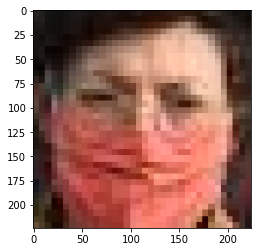

In [ ]:
# load an image from file
image = load_img('Face-Mask-Dataset/Test/WithMask/1163.png', target_size=(224, 224))
# convert the image pixels to a numpy array
# image = img_to_array(image)
plt.imshow(image)
# this is label one(Ashish)

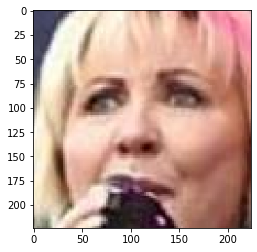

In [ ]:
image = load_img('Face-Mask-Dataset/Test/WithoutMask/1000.png', target_size=(224, 224))
# convert the image pixels to a numpy array
# image = img_to_array(image)
plt.imshow(image)

In [ ]:
history = model.fit(
        training_set,
        validation_data= validation_set,
        steps_per_epoch= training_set.samples/training_set.batch_size,
        validation_steps=validation_set.samples/validation_set.batch_size,
        epochs=10
        )

Epoch 1/10
625/625 [==============================] - 120s 193ms/step - loss: 0.3691 - binary_accuracy: 0.8415 - val_loss: 0.2168 - val_binary_accuracy: 0.9337
Epoch 2/10
625/625 [==============================] - 115s 184ms/step - loss: 0.1720 - binary_accuracy: 0.9551 - val_loss: 0.1522 - val_binary_accuracy: 0.9488
Epoch 3/10
625/625 [==============================] - 115s 184ms/step - loss: 0.1313 - binary_accuracy: 0.9600 - val_loss: 0.1234 - val_binary_accuracy: 0.9550
Epoch 4/10
625/625 [==============================] - 115s 183ms/step - loss: 0.1121 - binary_accuracy: 0.9645 - val_loss: 0.1191 - val_binary_accuracy: 0.9538
Epoch 5/10
625/625 [==============================] - 115s 184ms/step - loss: 0.0988 - binary_accuracy: 0.9681 - val_loss: 0.1012 - val_binary_accuracy: 0.9525
Epoch 6/10
625/625 [==============================] - 114s 183ms/step - loss: 0.0910 - binary_accuracy: 0.9709 - val_loss: 0.0988 - val_binary_accuracy: 0.9575
Epoch 7/10
625/625 [====================

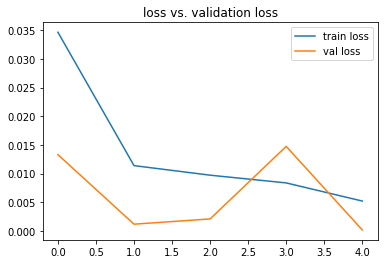

In [ ]:
plt.title('loss vs. validation loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

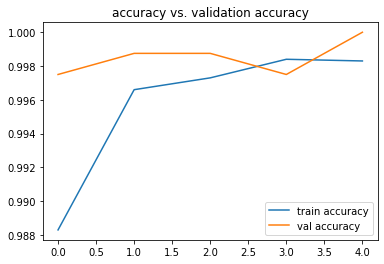

In [ ]:
plt.title('accuracy vs. validation accuracy')
plt.plot(history.history['binary_accuracy'], label = 'train accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

## Fine Tunning(미세조정)

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are taken into account
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

# model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
#               loss=keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=[keras.metrics.BinaryAccuracy()])

In [ ]:
history = model.fit(
        training_set,
        validation_data= validation_set,
        epochs=5,
        steps_per_epoch= len(training_set),
        validation_steps=len(validation_set)
        )

Epoch 1/5
625/625 [==============================] - 150s 240ms/step - loss: 0.0347 - binary_accuracy: 0.9883 - val_loss: 0.0133 - val_binary_accuracy: 0.9975
Epoch 2/5
625/625 [==============================] - 144s 230ms/step - loss: 0.0114 - binary_accuracy: 0.9966 - val_loss: 0.0012 - val_binary_accuracy: 0.9987
Epoch 3/5
625/625 [==============================] - 144s 230ms/step - loss: 0.0097 - binary_accuracy: 0.9973 - val_loss: 0.0021 - val_binary_accuracy: 0.9987
Epoch 4/5
625/625 [==============================] - 144s 230ms/step - loss: 0.0084 - binary_accuracy: 0.9984 - val_loss: 0.0147 - val_binary_accuracy: 0.9975
Epoch 5/5
625/625 [==============================] - 144s 230ms/step - loss: 0.0052 - binary_accuracy: 0.9983 - val_loss: 1.6043e-04 - val_binary_accuracy: 1.0000


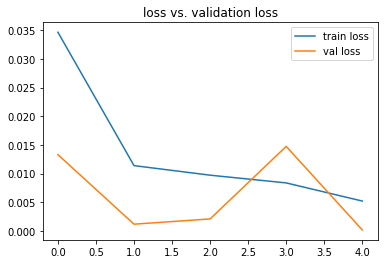

In [ ]:
plt.title('loss vs. validation loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

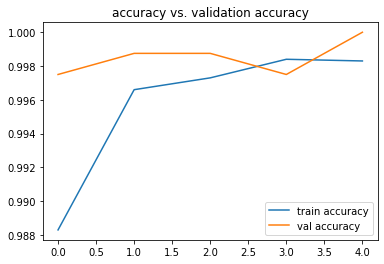

In [ ]:
plt.title('accuracy vs. validation accuracy')
plt.plot(history.history['binary_accuracy'], label = 'train accuracy')
plt.plot(history.history['val_binary_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

## 예측(Prediction)

In [ ]:
def predict_image(path):
    # load an image from file
    image = load_img(path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # predict the probability across all output classes
    yhat = model.predict(image)
    # return np.argmax(yhat)
    return yhat

In [ ]:
predict_image('Face-Mask-Dataset/Train/WithMask/1004.png')

array([[-1377.5715]], dtype=float32)

In [ ]:
predict_image('Face-Mask-Dataset/Train/WithoutMask/101.png')

array([[192.62567]], dtype=float32)

In [ ]:
predict_image('Face-Mask-Dataset/Train/WithoutMask/1020.png')

array([[1193.599]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

array([[-1831.8837]], dtype=float32)

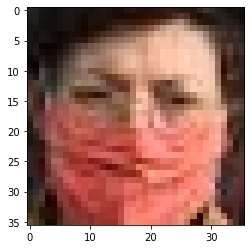

In [ ]:
make_predictions('Face-Mask-Dataset/Test/WithMask/1163.png')

array([[439.88794]], dtype=float32)

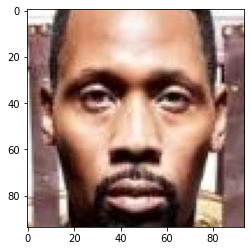

In [ ]:
make_predictions('Face-Mask-Dataset/Test/WithoutMask/1.png')

## 모델 저장

In [ ]:
model.save('fined_tuned_Mask_Model_logit.h5')

In [ ]:
def face_mask_classify(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Mask Wearing")
    else:
        print("That's No Mask")

It's Mask Wearing


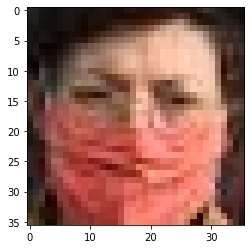

In [ ]:
face_mask_classify('Face-Mask-Dataset/Test/WithMask/1163.png')

That's No Mask


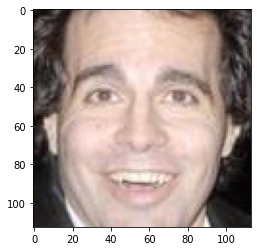

In [ ]:
face_mask_classify('Face-Mask-Dataset/Test/WithoutMask/1015.png')

It's Mask Wearing


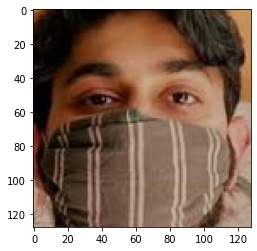

In [ ]:
face_mask_classify('Face-Mask-Dataset/Test/WithMask/1175.png')